# Análisis exploratorio de datos

En este notebook se realiza un análisis exploratorio del conjunto de datos procesado,
con el objetivo de comprender la distribución de las enfermedades y síntomas, identificar
patrones relevantes y extraer conclusiones que orienten el entrenamiento de los modelos
predictivos.


## Importación de librerías

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Carga del dataset procesado

In [12]:
ruta = "../datos/procesados/enfermedades_sintomas_limpio.csv"
df = pd.read_csv(ruta)

df.head()

,diseases,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Distribución de la variable objetivo (enfermedades)

### Número de enfermedades distintas

In [13]:
df['diseases'].nunique()

773

El conjunto de datos contiene un total de **773 enfermedades distintas**, lo que confirma que se trata de un problema de clasificación multiclase de alta complejidad.

Al analizar la frecuencia de aparición de las enfermedades, se observa que las más comunes presentan un número de casos muy similar, en torno a los 1.200 registros cada una. Este comportamiento indica que el dataset ha sido diseñado o balanceado de forma relativamente uniforme, evitando la presencia de clases dominantes.

Esta distribución equilibrada resulta especialmente adecuada para el entrenamiento de modelos de clasificación, ya que reduce el riesgo de sesgos hacia determinadas enfermedades y favorece un aprendizaje más justo y generalizable.


### Top 15 enfermedades más frecuentes

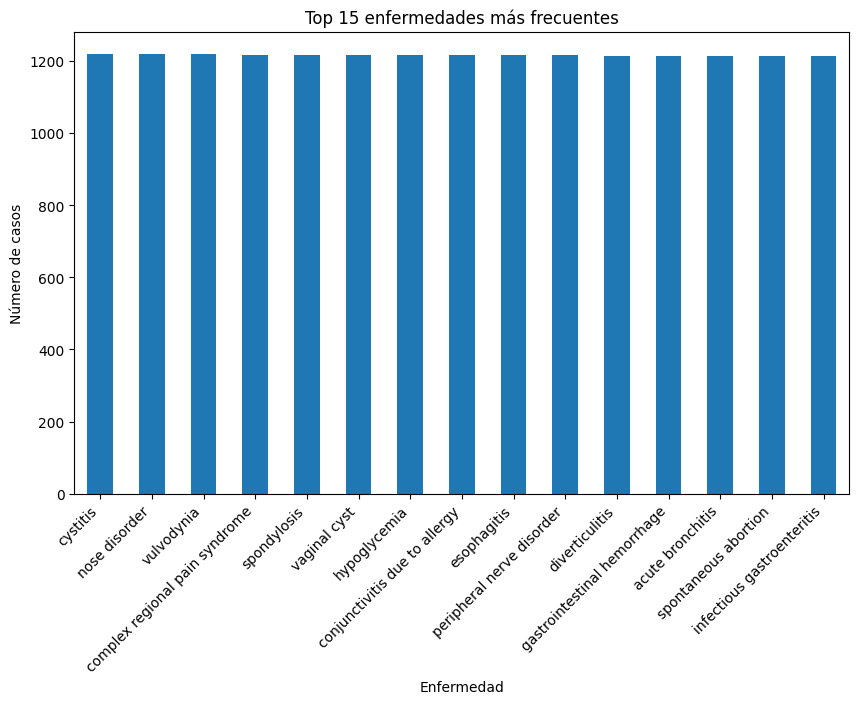

In [14]:
top_diseases = df['diseases'].value_counts().head(15)

plt.figure(figsize=(10,6))
top_diseases.plot(kind='bar')
plt.title("Top 15 enfermedades más frecuentes")
plt.ylabel("Número de casos")
plt.xlabel("Enfermedad")
plt.xticks(rotation=45, ha='right')
plt.show()


El gráfico del Top 15 de enfermedades más frecuentes muestra que todas las patologías representadas presentan un número de casos muy similar, situado en torno a los 1.200 registros por enfermedad.

Este comportamiento indica que el conjunto de datos está **altamente balanceado**, al menos para las enfermedades más representativas. No se observa ninguna clase dominante ni una caída brusca en la frecuencia de aparición, lo que reduce significativamente el riesgo de sesgos durante el entrenamiento de los modelos predictivos.

La homogeneidad en la distribución de las enfermedades sugiere que el dataset ha sido construido de forma controlada, permitiendo que el modelo aprenda patrones basados en la combinación de síntomas y no únicamente en la frecuencia de las clases. Esta característica es especialmente relevante en problemas de clasificación multiclase con un elevado número de categorías, como es el caso del presente proyecto.


## Distribución general de síntomas

### Frecuencia de aparición de síntomas

In [15]:
symptom_counts = df.drop(columns=['diseases']).sum().sort_values(ascending=False)
symptom_counts.head(15)

sharp_abdominal_pain       25152
vomiting                   22018
cough                      18899
headache                   18775
nausea                     18729
back_pain                  18578
sharp_chest_pain           18354
fever                      16709
shortness_of_breath        16295
nasal_congestion           13125
leg_pain                   13105
dizziness                  12696
abnormal_appearing_skin    12138
lower_abdominal_pain       12115
skin_swelling              11384
dtype: int64

El análisis de la frecuencia de aparición de los síntomas revela que algunos de ellos son significativamente más comunes que otros. Entre los síntomas más frecuentes se encuentran el dolor abdominal agudo, los vómitos, la tos y el dolor de cabeza, todos ellos síntomas transversales presentes en múltiples patologías.

Este patrón es coherente con la naturaleza médica del problema, ya que existen síntomas generales que pueden manifestarse en una gran variedad de enfermedades, mientras que otros síntomas son mucho más específicos y aparecen únicamente en contextos clínicos concretos.

La coexistencia de síntomas frecuentes y síntomas poco comunes aporta un alto valor informativo al conjunto de datos, ya que permite a los modelos distinguir entre patrones generales y señales específicas asociadas a determinadas enfermedades.


### Top 15 síntomas más frecuentes

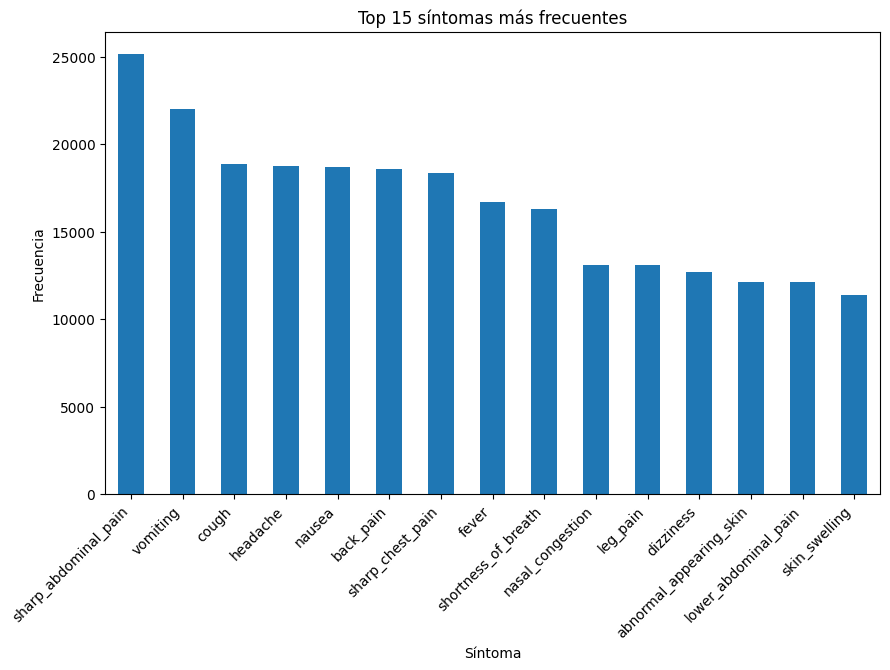

In [16]:
plt.figure(figsize=(10,6))
symptom_counts.head(15).plot(kind='bar')
plt.title("Top 15 síntomas más frecuentes")
plt.ylabel("Frecuencia")
plt.xlabel("Síntoma")
plt.xticks(rotation=45, ha='right')
plt.show()

El gráfico de los 15 síntomas más frecuentes confirma visualmente la existencia de una fuerte variabilidad en la aparición de los síntomas. Se aprecia una clara diferencia entre los síntomas más comunes y aquellos con menor frecuencia, lo que sugiere una distribución no uniforme de las variables de entrada.

Este comportamiento refuerza la necesidad de emplear modelos capaces de manejar un elevado número de características binarias y detectar combinaciones relevantes de síntomas, en lugar de basarse únicamente en la presencia individual de los más frecuentes.


## Relación síntomas–enfermedad

### Selección de enfermedades representativas

In [17]:
enfermedades_ejemplo = df['diseases'].value_counts().head(3).index
df_ejemplo = df[df['diseases'].isin(enfermedades_ejemplo)]

Para analizar la relación entre síntomas y enfermedades, se han seleccionado tres enfermedades representativas entre las más frecuentes del conjunto de datos: cystitis, nose disorder y vulvodynia.

El análisis muestra que cada enfermedad presenta un conjunto característico de síntomas predominantes, lo que confirma la existencia de patrones diferenciadores claros entre patologías.


### Síntomas más frecuentes por enfermedad

In [18]:
for enfermedad in enfermedades_ejemplo:
    sintomas_enf = (
        df[df['diseases'] == enfermedad]
        .drop(columns=['diseases'])
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
    print(f"\nTop síntomas para {enfermedad}:")
    print(sintomas_enf)


Top síntomas para cystitis:
involuntary_urination    639
side_pain                630
symptoms_of_bladder      628
frequent_urination       624
suprapubic_pain          614
blood_in_urine           613
lower_abdominal_pain     613
sharp_abdominal_pain     609
painful_urination        602
back_pain                587
dtype: int64

Top síntomas para nose disorder:
ear_pain                632
nosebleed               628
facial_pain             624
difficulty_breathing    619
painful_sinuses         617
cough                   616
nasal_congestion        608
headache                607
fever                   603
sinus_congestion        603
dtype: int64

Top síntomas para vulvodynia:
back_pain                 632
vaginal_discharge         627
lower_abdominal_pain      616
nausea                    613
pelvic_pain               611
pain_during_pregnancy     609
painful_urination         608
side_pain                 600
burning_abdominal_pain    595
cramps_and_spasms         594
dtype: int

En el caso de la cystitis, los síntomas más frecuentes están directamente relacionados con el sistema urinario, como la micción involuntaria, la micción frecuente, el dolor suprapúbico y la presencia de sangre en la orina. Esta coherencia clínica valida la calidad del dataset y demuestra que los síntomas asociados a cada enfermedad reflejan relaciones médicas plausibles.


Para nose disorder, predominan síntomas relacionados con las vías respiratorias superiores, como el dolor de oído, la congestión nasal, el sangrado nasal y el dolor facial. Estos resultados refuerzan la capacidad del conjunto de datos para capturar asociaciones específicas entre síntomas y enfermedades de una misma región anatómica.


En el caso de la vulvodynia, los síntomas más frecuentes incluyen dolor pélvico, flujo vaginal, dolor abdominal bajo y molestias asociadas a la micción. De nuevo, se observa una relación coherente entre la enfermedad y los síntomas predominantes, lo que sugiere que los datos contienen información discriminativa relevante para la clasificación.


## Conclusiones del análisis exploratorio

El análisis exploratorio realizado permite concluir que el conjunto de datos presenta una estructura sólida y coherente desde el punto de vista clínico y estadístico. La distribución equilibrada de las enfermedades, junto con la presencia de síntomas tanto generales como específicos, proporciona un contexto adecuado para el entrenamiento de modelos de aprendizaje automático.

Asimismo, la clara diferenciación de patrones sintomáticos entre enfermedades refuerza la hipótesis de que el problema es abordable mediante técnicas de clasificación supervisada, y justifica el uso de modelos capaces de manejar alta dimensionalidad y relaciones no lineales entre variables.
